In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

### 转换成one-hot编码代码实现

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
        
    return results    

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 构建model

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='softmax', input_shape=(10000,)))
model.add(layers.Dense(32, activation='softmax'))
model.add(layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1


In [8]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.mse, metrics=metrics.binary_accuracy)

In [9]:
x_val = x_train[:10000]
x_train_partial = x_train[10000:]

y_val = y_train[:10000]
y_train_partial = y_train[10000:]

In [10]:
history = model.fit(x_train_partial, y_train_partial, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2023-05-07 18:11:24.712460: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 2s 37ms/step - loss: 0.2491 - binary_accuracy: 0.5717 - val_loss: 0.2477 - val_binary_accuracy: 0.7891
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2461 - binary_accuracy: 0.8447 - val_loss: 0.2448 - val_binary_accuracy: 0.8486
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2428 - binary_accuracy: 0.8751 - val_loss: 0.2418 - val_binary_accuracy: 0.8616
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2394 - binary_accuracy: 0.8916 - val_loss: 0.2386 - val_binary_accuracy: 0.8702
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2357 - binary_accuracy: 0.9018 - val_loss: 0.2351 - val_binary_accuracy: 0.8758
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2316 - binary_accuracy: 0.9111 - val_loss: 0.2314 - val_binary_accuracy: 0.8800
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2273 -

### 绘制训练损失和验证损失

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


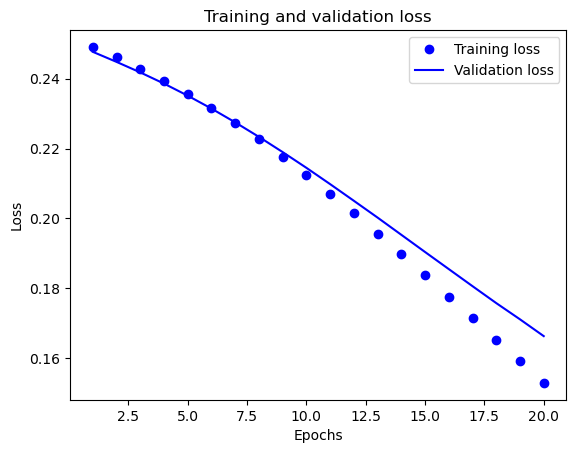

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

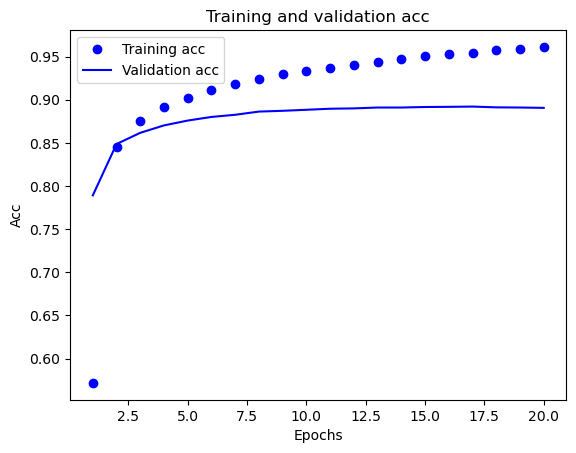

In [12]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(val_acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [13]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.1684 - binary_accuracy: 0.8846


In [14]:
results

[0.1683841198682785, 0.8845599889755249]